# Загрузка датасета 1

In [1]:
!python3 prepare_dataset1_script.py

100% 218M/218M [00:02<00:00, 109MB/s]
Extracting files...
Dataset downloaded successfully
Annotations converted to YOLOv8 format


# Загрузка датасета 2


In [2]:
!python3 prepare_dataset2_script.py

100% 99.8M/99.8M [00:00<00:00, 210MB/s]
Extracting files...
Dataset downloaded successfully


# Загрузка датасета 3

In [3]:
!pip install gdown

In [4]:
import gdown

url = 'https://drive.google.com/uc?export=download&id=1RUifIEw1WBIkyHh9ohgnFLzGXnVGG9ll'

output = 'data.zip'

gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1RUifIEw1WBIkyHh9ohgnFLzGXnVGG9ll
From (redirected): https://drive.google.com/uc?export=download&id=1RUifIEw1WBIkyHh9ohgnFLzGXnVGG9ll&confirm=t&uuid=353d2fc2-e20e-4e09-877f-900a4023f3fd
To: /content/data.zip
100%|██████████| 7.26G/7.26G [01:43<00:00, 70.2MB/s]


'data.zip'

In [6]:
!unzip /content/data.zip -d /content

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/bdd100k_seg/bdd100k/seg/labels/train/003ddde7-36ee8299_train_id.png  
  inflating: /content/data/bdd100k_seg/bdd100k/seg/labels/train/80b3fc35-c3496b02_train_id.png  
  inflating: /content/data/bdd100k_seg/bdd100k/seg/labels/train/7f1ff0c2-ace62968_train_id.png  
  inflating: /content/data/bdd100k_seg/bdd100k/seg/labels/train/802d8d74-d8efa049_train_id.png  
  inflating: /content/data/bdd100k_seg/bdd100k/seg/labels/train/05fa6494-51df5b78_train_id.png  
  inflating: /content/data/bdd100k_seg/bdd100k/seg/labels/train/bab26b8d-deaa5510_train_id.png  
  inflating: /content/data/bdd100k_seg/bdd100k/seg/labels/train/2b49d4cc-9dd70000_train_id.png  
  inflating: /content/data/bdd100k_seg/bdd100k/seg/labels/train/4573bc68-4884d472_train_id.png  
  inflating: /content/data/bdd100k_seg/bdd100k/seg/labels/train/5e412e85-91a1697d_train_id.png  
  inflating: /content/data/bdd100k_seg/bdd100k/seg/labels/train/06a9e960-0b4

In [7]:
import os
import shutil

BASE_DIR = "/content/data/bdd100k"
DATASET_DIR = os.path.join(BASE_DIR, "dataset")
LABELS_DIR = os.path.join(BASE_DIR, "labels")

NEW_STRUCTURE = {
    "train": {"images": os.path.join(BASE_DIR, "train/images"),
              "labels": os.path.join(BASE_DIR, "train/labels")},
    "val": {"images": os.path.join(BASE_DIR, "val/images"),
            "labels": os.path.join(BASE_DIR, "val/labels")},
    "test": {"images": os.path.join(BASE_DIR, "test/images")}
}

for split in NEW_STRUCTURE:
    os.makedirs(NEW_STRUCTURE[split]["images"], exist_ok=True)
    if "labels" in NEW_STRUCTURE[split]:
        os.makedirs(NEW_STRUCTURE[split]["labels"], exist_ok=True)


def move_files(split):
    image_src_dir = os.path.join(DATASET_DIR, split)
    image_dst_dir = NEW_STRUCTURE[split]["images"]

    for img_file in os.listdir(image_src_dir):
        if img_file.endswith(".jpg"):
            shutil.move(os.path.join(image_src_dir, img_file), os.path.join(image_dst_dir, img_file))

    if "labels" in NEW_STRUCTURE[split]:
        label_src_dir = os.path.join(LABELS_DIR, split)
        label_dst_dir = NEW_STRUCTURE[split]["labels"]

        for label_file in os.listdir(label_src_dir):
            if label_file.endswith(".txt"):
                shutil.move(os.path.join(label_src_dir, label_file), os.path.join(label_dst_dir, label_file))


for split in ["train", "val"]:
    move_files(split)

test_src_dir = os.path.join(DATASET_DIR, "test")
test_dst_dir = NEW_STRUCTURE["test"]["images"]
for img_file in os.listdir(test_src_dir):
    if img_file.endswith(".jpg"):
        shutil.move(os.path.join(test_src_dir, img_file), os.path.join(test_dst_dir, img_file))

print("✅ Данные успешно перемещены в новую структуру!")


✅ Данные успешно перемещены в новую структуру!


# Объединение датасетов

In [8]:
import os
import shutil

def update_labels(directory):
    for file_name in os.listdir(directory):
        file_path = os.path.join(directory, file_name)
        if os.path.isfile(file_path):
            with open(file_path, 'r') as file:
                lines = file.readlines()

            updated_lines = []
            for line in lines:
                parts = line.split()
                if parts:
                    parts[0] = '0'
                    updated_lines.append(' '.join(parts) + '\n')

            with open(file_path, 'w') as file:
                file.writelines(updated_lines)
            print(f"Обновлен файл: {file_path}")

def move_files(source_dir, target_dir):
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    for file_name in os.listdir(source_dir):
        source_path = os.path.join(source_dir, file_name)
        target_path = os.path.join(target_dir, file_name)

        if os.path.isfile(source_path):
            shutil.move(source_path, target_path)
            print(f"Перемещен: {source_path} -> {target_path}")

dataset1_images = "/content/dataset1/images"
dataset1_labels = "/content/dataset1/annotations"

dataset2_images_train = "/content/dataset2/train/images"
dataset2_labels_train = "/content/dataset2/train/labels"

dataset2_images_valid = "/content/dataset2/valid/images"
dataset2_labels_valid = "/content/dataset2/valid/labels"

dataset2_images_test = "/content/dataset2/test/images"
dataset2_labels_test = "/content/dataset2/test/labels"

bdd100k_train_images = "/content/data/bdd100k/train/images"
bdd100k_train_labels = "/content/data/bdd100k/train/labels"

update_labels(dataset1_labels)
update_labels(dataset2_labels_train)
update_labels(dataset2_labels_valid)
update_labels(dataset2_labels_test)

move_files(dataset1_images, bdd100k_train_images)
move_files(dataset1_labels, bdd100k_train_labels)

move_files(dataset2_images_train, bdd100k_train_images)
move_files(dataset2_labels_train, bdd100k_train_labels)
move_files(dataset2_images_valid, bdd100k_train_images)
move_files(dataset2_labels_valid, bdd100k_train_labels)
move_files(dataset2_images_test, bdd100k_train_images)
move_files(dataset2_labels_test, bdd100k_train_labels)

print("Обновление меток и перемещение завершены!")


Streaming output truncated to the last 5000 lines.
Перемещен: /content/dataset2/train/labels/00008_00045_00008_png.rf.82db95f04f079611574c84381458f783.txt -> /content/data/bdd100k/train/labels/00008_00045_00008_png.rf.82db95f04f079611574c84381458f783.txt
Перемещен: /content/dataset2/train/labels/FisheyeCamera_1_00572_png.rf.7eea926804b2ab11c52ba54113894146.txt -> /content/data/bdd100k/train/labels/FisheyeCamera_1_00572_png.rf.7eea926804b2ab11c52ba54113894146.txt
Перемещен: /content/dataset2/train/labels/00008_00038_00029_png.rf.ea722d02226285b0bdbe5c8e0e13fb6c.txt -> /content/data/bdd100k/train/labels/00008_00038_00029_png.rf.ea722d02226285b0bdbe5c8e0e13fb6c.txt
Перемещен: /content/dataset2/train/labels/00005_00013_00013_png.rf.d0cf5899c7e6d56af12e07a30c627e74.txt -> /content/data/bdd100k/train/labels/00005_00013_00013_png.rf.d0cf5899c7e6d56af12e07a30c627e74.txt
Перемещен: /content/dataset2/train/labels/00014_00006_00027_png.rf.d6bedfe81645b563c64e562aa7c70307.txt -> /content/data/bdd1

In [14]:
import random

def delete_random_files(directory, percentage=90):
    files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    num_to_delete = int(len(files) * (percentage / 100))
    files_to_delete = random.sample(files, num_to_delete)

    for file_name in files_to_delete:
        file_path = os.path.join(directory, file_name)
        os.remove(file_path)
        print(f"Удален: {file_path}")

delete_random_files(bdd100k_train_images, 90)

Streaming output truncated to the last 5000 lines.
Удален: /content/data/bdd100k/train/images/172682ff-751aedf4.jpg
Удален: /content/data/bdd100k/train/images/02ebe84b-56c964eb.jpg
Удален: /content/data/bdd100k/train/images/000076_jpg.rf.0066537c077a3d460d354c5de1fef980.jpg
Удален: /content/data/bdd100k/train/images/9c783663-606d0ee0.jpg
Удален: /content/data/bdd100k/train/images/3c4adaf2-c3a53678.jpg
Удален: /content/data/bdd100k/train/images/001996_jpg.rf.e04928f5210adad4b15f5a851c83b514.jpg
Удален: /content/data/bdd100k/train/images/713a5718-e84377e6.jpg
Удален: /content/data/bdd100k/train/images/47541057-e300231a.jpg
Удален: /content/data/bdd100k/train/images/0a6113ce-65c99332.jpg
Удален: /content/data/bdd100k/train/images/09057268-409c12ee.jpg
Удален: /content/data/bdd100k/train/images/2f25399c-2ecdc373.jpg
Удален: /content/data/bdd100k/train/images/5069db50-52f5af30.jpg
Удален: /content/data/bdd100k/train/images/0c5089c9-d53459d0.jpg
Удален: /content/data/bdd100k/train/images/071

# Подготовка модели

In [9]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 17274, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 17274 (delta 1), reused 0 (delta 0), pack-reused 17271 (from 3)
Receiving objects: 100% (17274/17274), 16.12 MiB | 23.45 MiB/s, done.
Resolving deltas: 100% (11862/11862), done.


In [10]:
%cd yolov5
!pip install -r requirements.txt

/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 56.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5

In [11]:
%cp /content/yolov5/data/VOC.yaml /content/yolov5/VOC.yaml

In [12]:
import os

LABELS_DIRS = [
    "/content/data/bdd100k/train/labels",
    "/content/data/bdd100k/val/labels"
]

def replace_class_id(labels_dir, old_id="9", new_id="0"):
    for file_name in os.listdir(labels_dir):
        file_path = os.path.join(labels_dir, file_name)
        if file_path.endswith(".txt"):
            with open(file_path, "r") as f:
                lines = f.readlines()

            new_lines = []
            for line in lines:
                parts = line.strip().split()
                if len(parts) > 0 and parts[0] == old_id:
                    parts[0] = new_id
                new_lines.append(" ".join(parts))

            with open(file_path, "w") as f:
                f.write("\n".join(new_lines) + "\n")

for labels_dir in LABELS_DIRS:
    replace_class_id(labels_dir)

print("✅ ID в разметке заменён с 9 на 0 во всех файлах!")


✅ ID в разметке заменён с 9 на 0 во всех файлах!


# Обучение и валидация модели

In [15]:
!python /content/yolov5/train.py --img 320 --batch 16 --epochs 30 --data /content/yolov5/VOC.yaml --weights /content/yolov5/yolov5s.pt --workers 2

Streaming output truncated to the last 5000 lines.
      24/29      1.13G     0.1029    0.01414          0         88        320:  82% 388/474 [01:59<00:24,  3.55it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      24/29      1.13G     0.1029    0.01416          0        128        320:  82% 389/474 [01:59<00:20,  4.10it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      24/29      1.13G     0.1029    0.01415          0         63        320:  82% 390/474 [01:59<00:22,  3.77it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      24/29      1.13G     0.10

# Подсчет метрик

In [16]:
import pandas as pd

metrics_path = "/content/yolov5/runs/train/exp/results.csv"
df = pd.read_csv(metrics_path)

df.columns = df.columns.str.strip()

last_epoch = df.iloc[-1]

metrics = {
    "Precision": last_epoch["metrics/precision"],
    "Recall": last_epoch["metrics/recall"],
    "mAP_50": last_epoch["metrics/mAP_0.5"],
    "mAP_50-95": last_epoch["metrics/mAP_0.5:0.95"],
    "Validation Box Loss": last_epoch["val/box_loss"],
    "Validation Object Loss": last_epoch["val/obj_loss"],
}

metrics

{'Precision': 0.54422,
 'Recall': 0.34296,
 'mAP_50': 0.34187,
 'mAP_50-95': 0.14405,
 'Validation Box Loss': 0.10352,
 'Validation Object Loss': 0.014371}

In [17]:
precision = metrics["Precision"]
recall = metrics["Recall"]


f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
print(f'{f1_score=}')

f1_score=0.42076171960594244


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-3-17 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


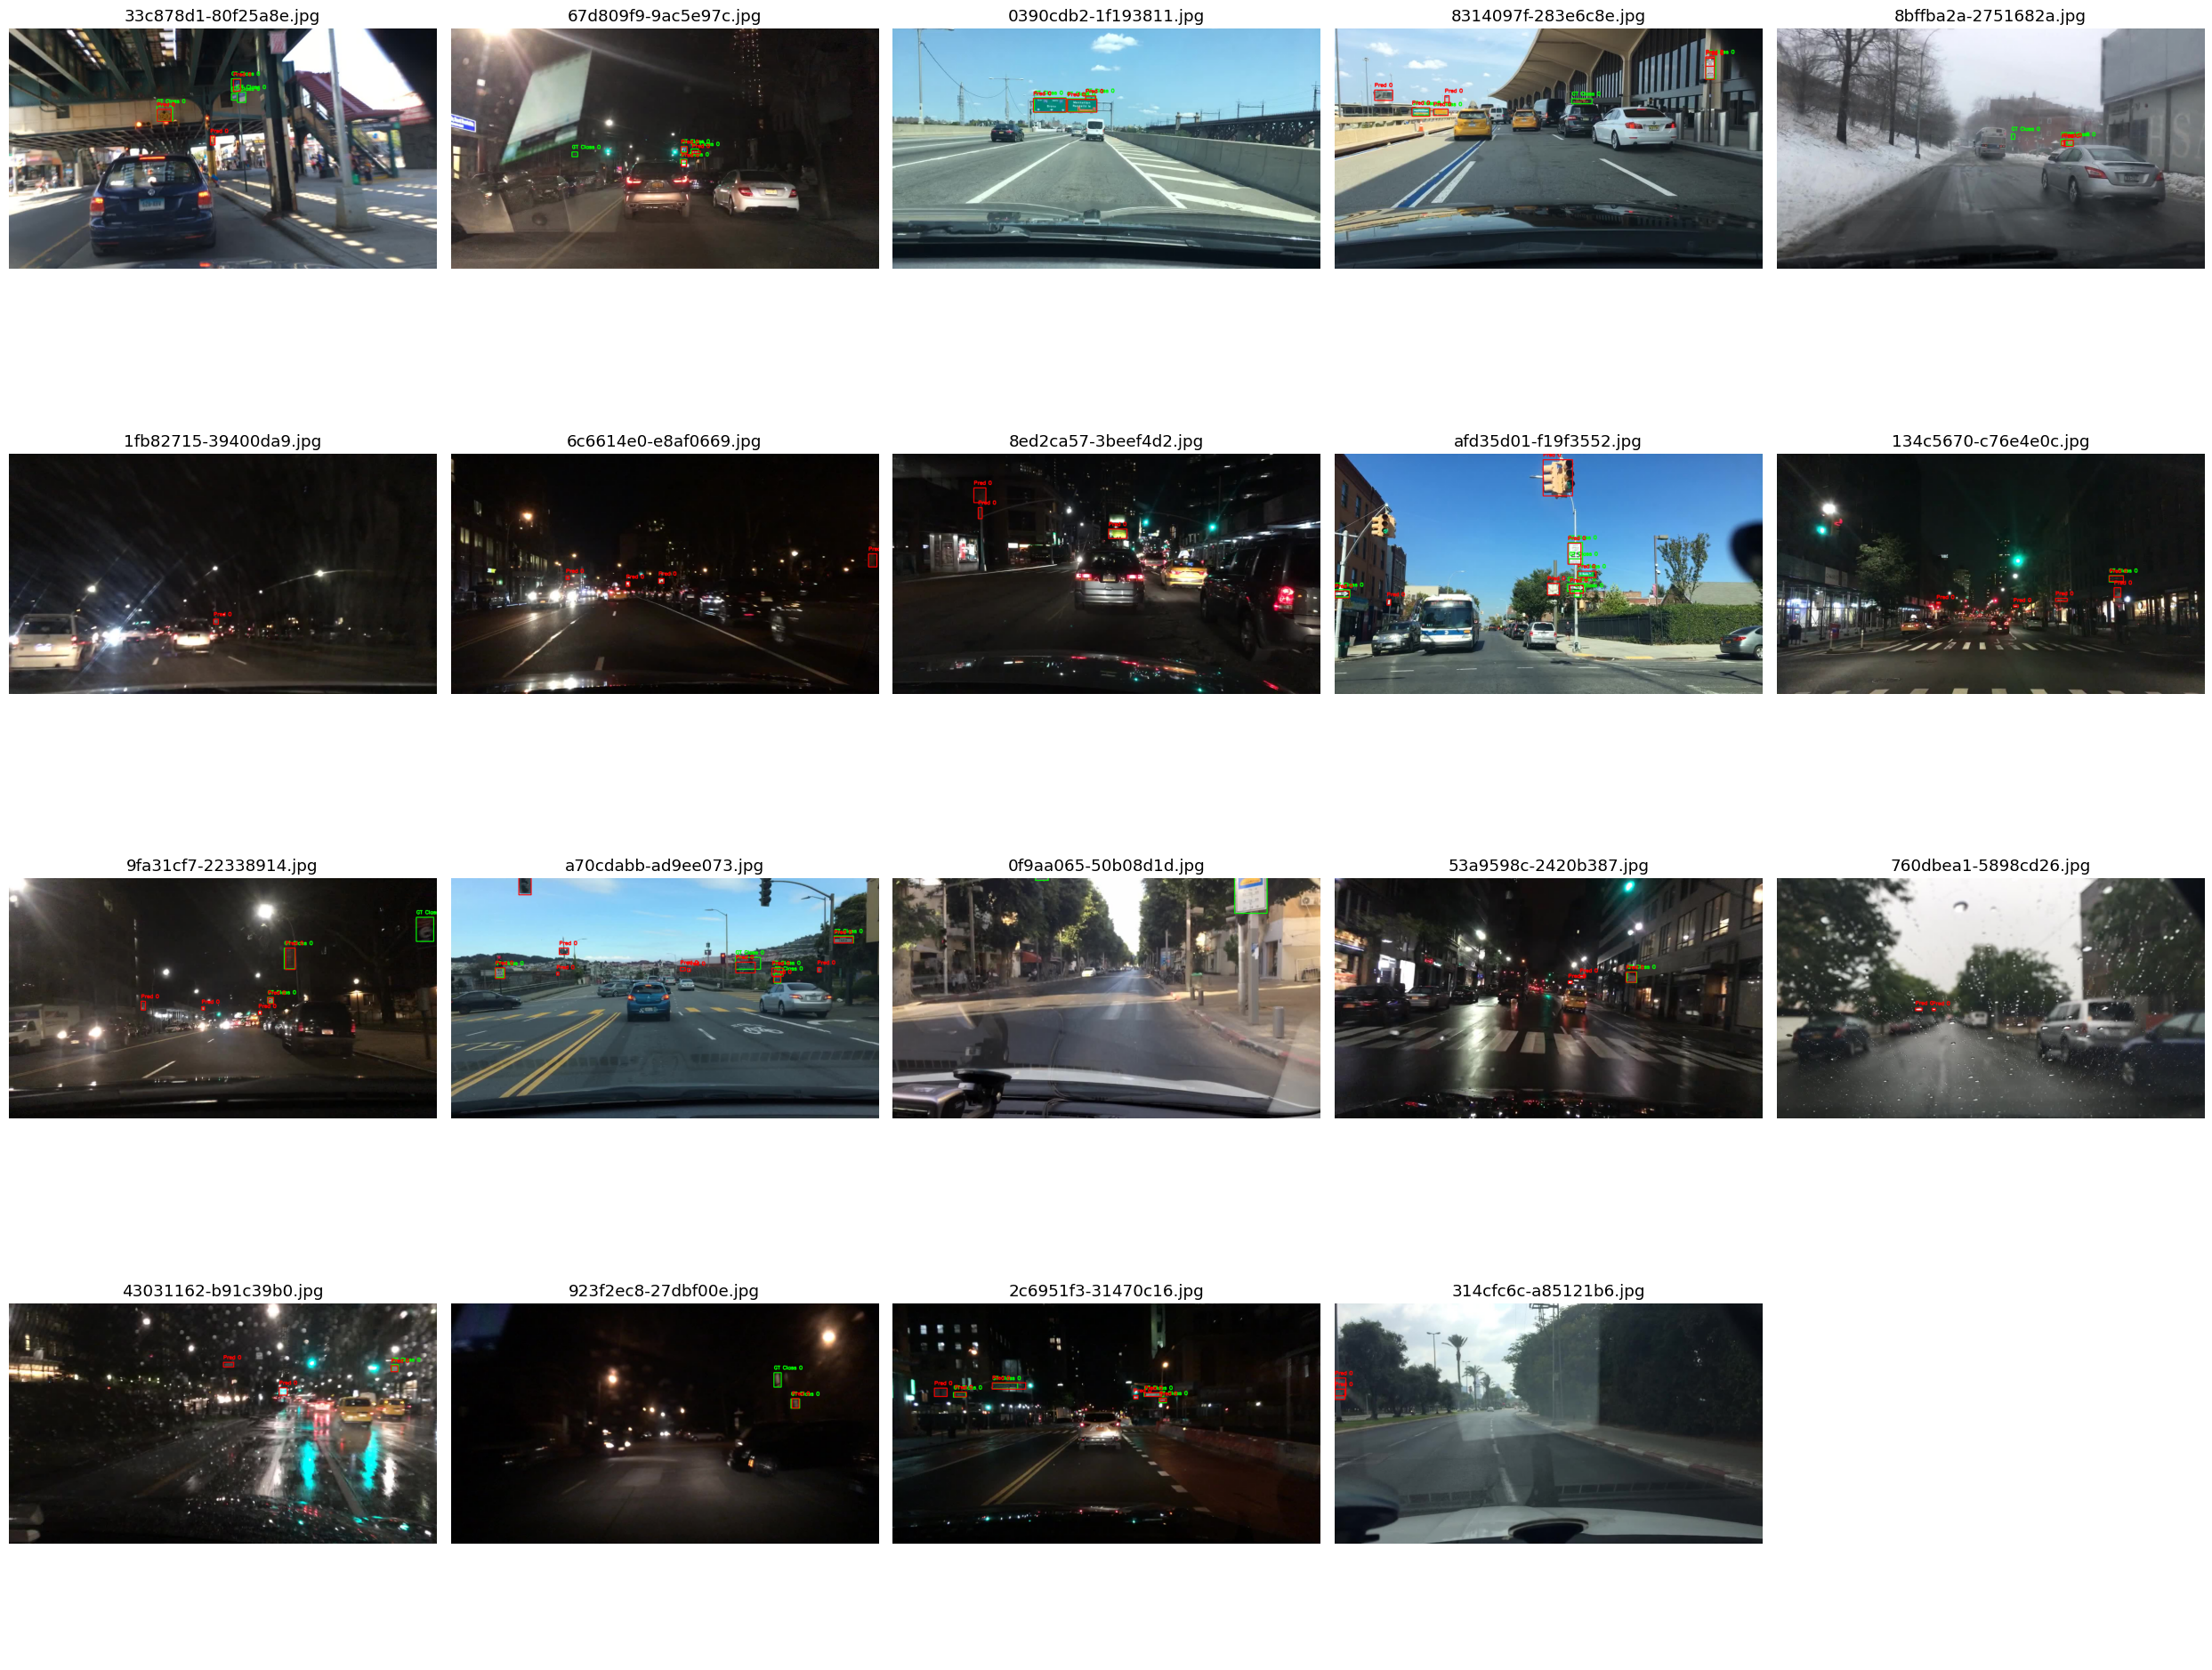

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import torch
import random

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

model_path = "/content/yolov5/runs/train/exp/weights/best.pt"
val_images_dir = "/content/data/bdd100k/train/images"
val_labels_dir = "/content/data/bdd100k/train/labels"


model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path, force_reload=True)


def read_yolo_labels(label_path):
    boxes = []
    with open(label_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            line = line.strip()
            if line:
                parts = line.split()
                if len(parts) == 5:
                    class_id, x_center, y_center, w, h = map(float, parts)
                    boxes.append((class_id, x_center, y_center, w, h))
    return boxes


def draw_boxes(img, boxes, color, label_prefix=""):
    h, w, _ = img.shape
    for class_id, x_center, y_center, box_w, box_h in boxes:
        x1 = int((x_center - box_w / 2) * w)
        y1 = int((y_center - box_h / 2) * h)
        x2 = int((x_center + box_w / 2) * w)
        y2 = int((y_center + box_h / 2) * h)
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, f"{label_prefix} Class {int(class_id)}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)


image_files = os.listdir(val_images_dir)


num_samples = np.random.randint(10, 21)
sampled_images = random.sample(image_files, num_samples)


fig, axes = plt.subplots(4, 5, figsize=(25, 20))
axes = axes.ravel()

for idx, img_name in enumerate(sampled_images):
    img_path = os.path.join(val_images_dir, img_name)
    label_path = os.path.join(val_labels_dir, os.path.splitext(img_name)[0] + ".txt")

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    results = model(img)


    if os.path.exists(label_path):
        gt_boxes = read_yolo_labels(label_path)
        draw_boxes(img, gt_boxes, color=(0, 255, 0), label_prefix="GT")


    pred_boxes = results.pandas().xyxy[0]
    for _, row in pred_boxes.iterrows():
        x1, y1, x2, y2, conf, class_id = row[['xmin', 'ymin', 'xmax', 'ymax', 'confidence', 'class']]
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
        cv2.putText(img, f"Pred {int(class_id)}", (int(x1), int(y1) - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    axes[idx].imshow(img)
    axes[idx].set_title(f"{img_name}")
    axes[idx].axis("off")

for i in range(num_samples, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()
